In [2]:
#Install library yang dibutuhkan dalam project ini
!pip install pandas matplotlib seaborn scikit-learn

In [4]:
# 1. Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

### 2.4. Proses pengambilan data dijalankan sesuai dengan tools yang telah disiapkan

In [5]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df1 = pd.read_csv('ss.csv')
df2 = pd.read_csv('Sleep_health_and_lifestyle_dataset_part_2.csv')
df3 = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

df = pd.concat([df1, df2, df3])

## 3. Mengintegrasikan data

### 3.1. Integritas data diperiksa sesuai tujuan teknis data science

In [6]:
print("5 Baris Pertama Data:")
display(df.head())

5 Baris Pertama Data:


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


### 3.2. Data diintegrasikan sesuai tujuan teknis data science

In [7]:
# 5. Informasi umum dataset
print("\nInformasi Dataset:")
df.info()


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 933 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                933 non-null    int64  
 1   Gender                   933 non-null    object 
 2   Age                      933 non-null    int64  
 3   Occupation               933 non-null    object 
 4   Sleep Duration           933 non-null    float64
 5   Quality of Sleep         933 non-null    int64  
 6   Physical Activity Level  933 non-null    int64  
 7   Stress Level             933 non-null    int64  
 8   BMI Category             933 non-null    object 
 9   Blood Pressure           933 non-null    object 
 10  Heart Rate               933 non-null    int64  
 11  Daily Steps              933 non-null    int64  
 12  Sleep Disorder           339 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 102.0+ KB


In [8]:
# 6. Statistik deskriptif data numerik
print("\nStatistik Deskriptif:")
display(df.describe())


Statistik Deskriptif:


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000
mean,242.920686,40.868167,7.121329,7.288317,58.923901,5.431940,70.175777,6819.185423
std,149.509485,8.399033,0.763678,1.158771,20.304326,1.714908,3.979720,1564.283002
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,117.000000,34.000000,6.500000,6.000000,45.000000,4.000000,68.000000,5500.000000
50%,234.000000,39.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,350.000000,45.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,559.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [9]:
# 7. Cek nilai kosong
print("\nCek Missing Values:")
display(df.isnull().sum())


Cek Missing Values:


,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [10]:
# Analisis kolom kategorikal terkait insomnia
print("\nDistribusi Sleep Disorder:")
display(df['Sleep Disorder'].value_counts())


Distribusi Sleep Disorder:


,count
Sleep Disorder,
Insomnia,170
Sleep Apnea,169


In [11]:
# Korelasi antar fitur numerik
print("\nKorelasi Fitur Numerik:")
display(df.corr(numeric_only=True))


Korelasi Fitur Numerik:


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Person ID,1.000000,0.391140,0.166867,0.253609,0.087436,-0.220987,-0.141859,0.034024
Age,0.391140,1.000000,0.319961,0.455912,0.183696,-0.416181,-0.210458,0.056599
Sleep Duration,0.166867,0.319961,1.000000,0.860940,0.316092,-0.792406,-0.502761,0.061182
Quality of Sleep,0.253609,0.455912,0.860940,1.000000,0.265844,-0.894245,-0.668517,0.103374
Physical Activity Level,0.087436,0.183696,0.316092,0.265844,1.000000,-0.118553,0.063663,0.760358
Stress Level,-0.220987,-0.416181,-0.792406,-0.894245,-0.118553,1.000000,0.657336,0.100300
Heart Rate,-0.141859,-0.210458,-0.502761,-0.668517,0.063663,0.657336,1.000000,-0.105867
Daily Steps,0.034024,0.056599,0.061182,0.103374,0.760358,0.100300,-0.105867,1.000000


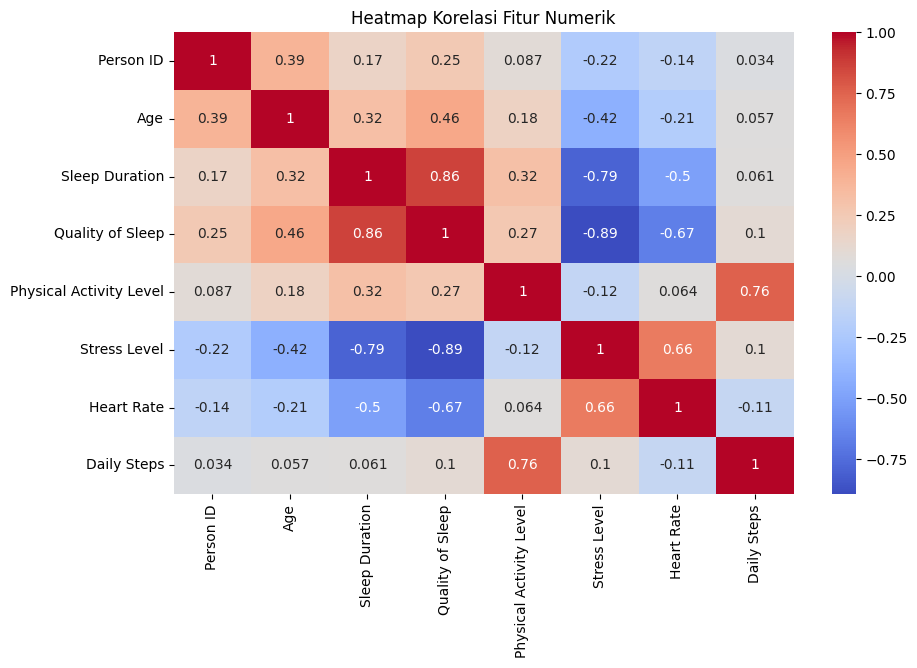

In [12]:
# Heatmap korelasi
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()

## Data Preparasi

In [13]:
# Tampilkan info awal dan missing values
print("Informasi awal dataset:")
print(df.info())

Informasi awal dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 933 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                933 non-null    int64  
 1   Gender                   933 non-null    object 
 2   Age                      933 non-null    int64  
 3   Occupation               933 non-null    object 
 4   Sleep Duration           933 non-null    float64
 5   Quality of Sleep         933 non-null    int64  
 6   Physical Activity Level  933 non-null    int64  
 7   Stress Level             933 non-null    int64  
 8   BMI Category             933 non-null    object 
 9   Blood Pressure           933 non-null    object 
 10  Heart Rate               933 non-null    int64  
 11  Daily Steps              933 non-null    int64  
 12  Sleep Disorder           339 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 102.0+ KB
No

In [14]:
df.drop(columns=['Person ID','Occupation'], inplace=True)

In [15]:
numerical_cols = df.select_dtypes(include='number').columns

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 933 entries, 0 to 373
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   933 non-null    object 
 1   Age                      933 non-null    int64  
 2   Sleep Duration           933 non-null    float64
 3   Quality of Sleep         933 non-null    int64  
 4   Physical Activity Level  933 non-null    int64  
 5   Stress Level             933 non-null    int64  
 6   BMI Category             933 non-null    object 
 7   Blood Pressure           933 non-null    object 
 8   Heart Rate               933 non-null    int64  
 9   Daily Steps              933 non-null    int64  
 10  Sleep Disorder           339 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 87.5+ KB


## Pembersihan Data

In [17]:
print("Missing values per kolom:")
print(df.isnull().sum())

# Jika ada missing values, drop saja untuk sekarang
df.dropna(inplace=True)

Missing values per kolom:
Gender                       0
Age                          0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             594
dtype: int64


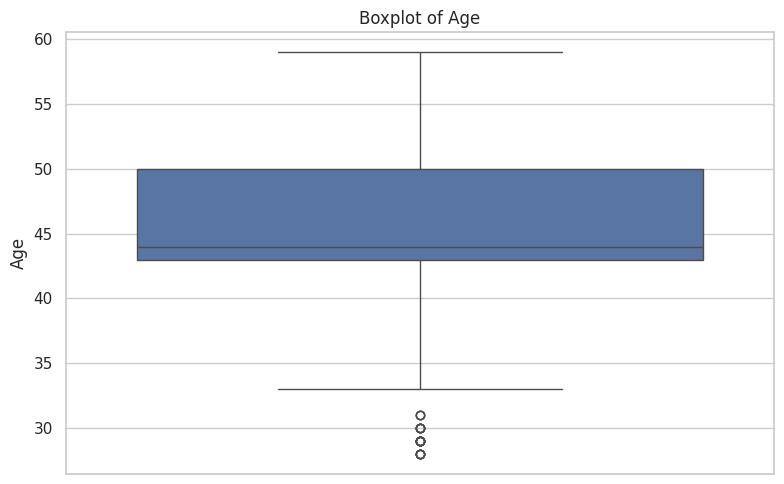

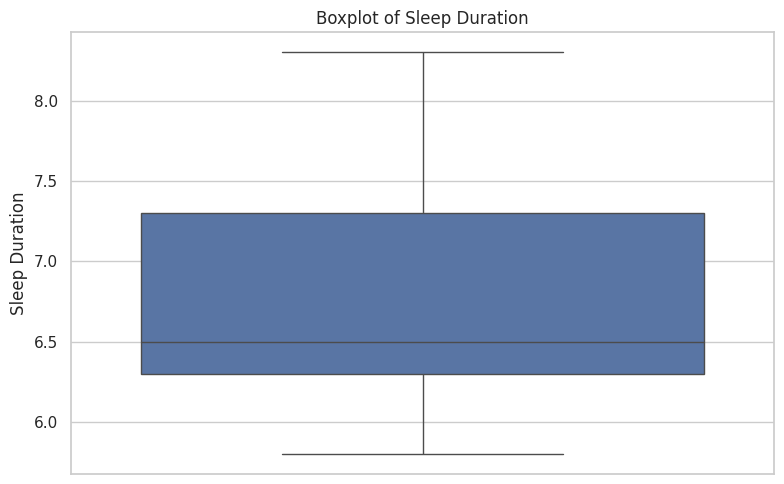

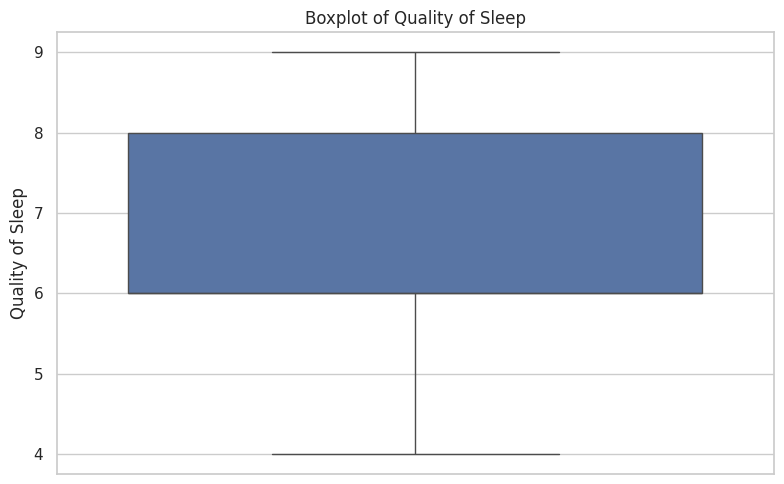

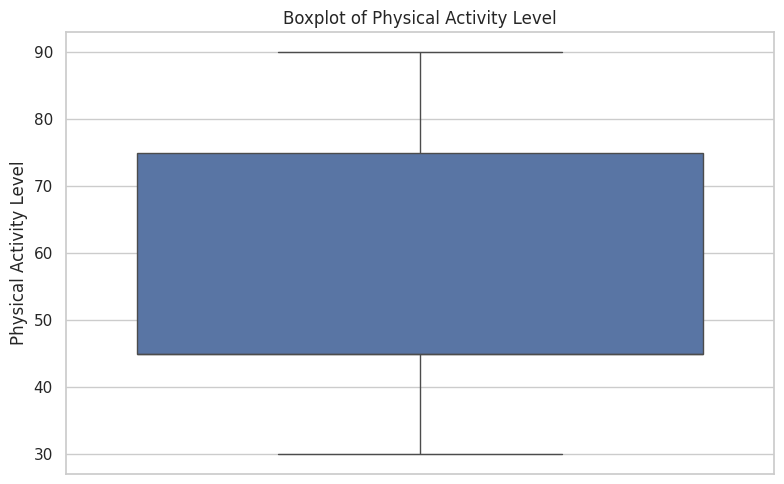

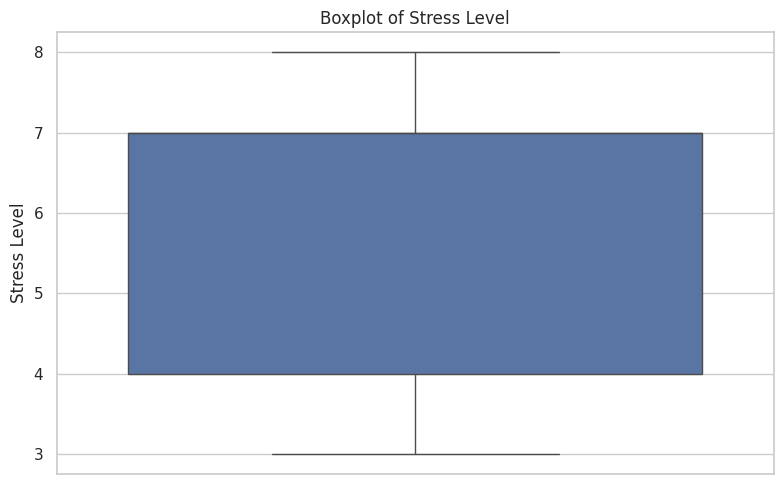

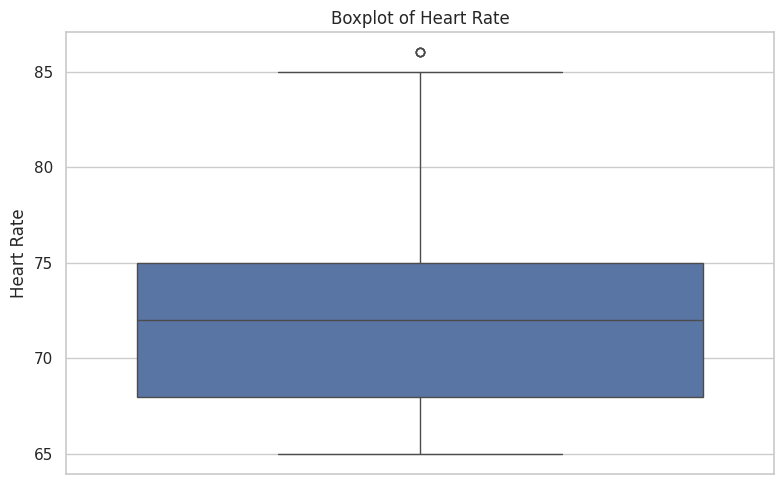

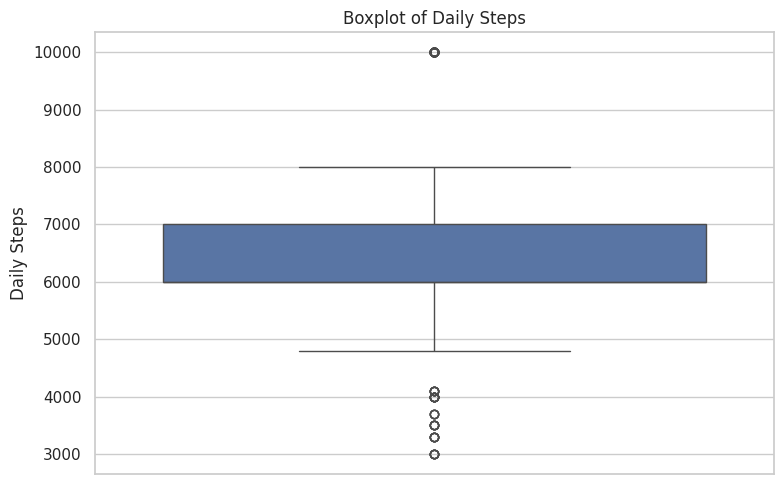

In [18]:
# Set style visual
sns.set(style="whitegrid")

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [19]:
def remove_outliers_iqr(data, column):
    if not pd.api.types.is_numeric_dtype(data[column]):
        return data
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

# Terapkan untuk semua kolom numerik kecuali target
for col in numerical_cols:
    df = remove_outliers_iqr(df, col)

## Validasi Data

In [20]:
print("Missing values per kolom setelah dibersihkan:")
print(df.isnull().sum())

Missing values per kolom setelah dibersihkan:
Gender                     0
Age                        0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


In [21]:
print(f"Hasil Akhir setelah dibersihkan: {df.shape}")

Hasil Akhir setelah dibersihkan: (236, 11)


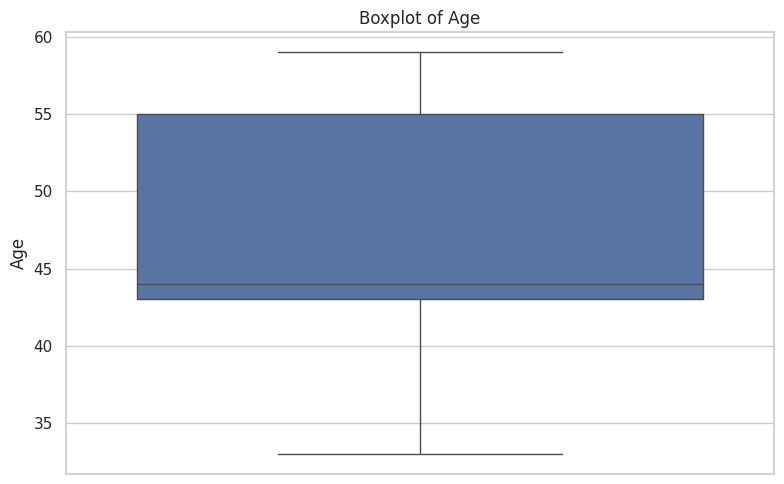

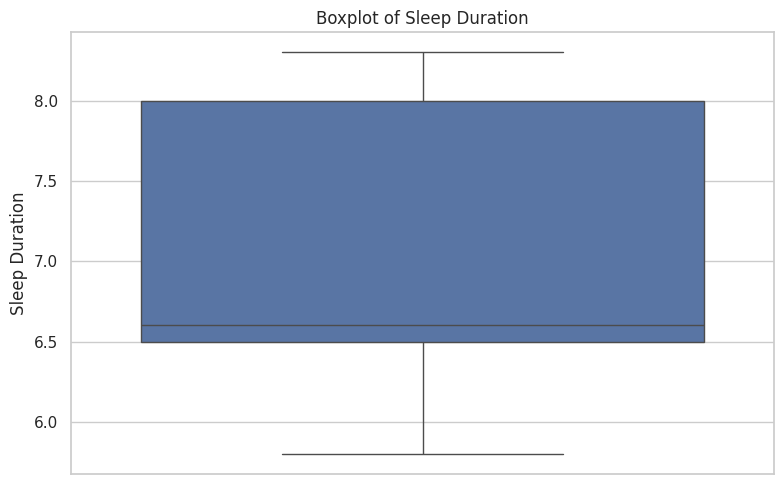

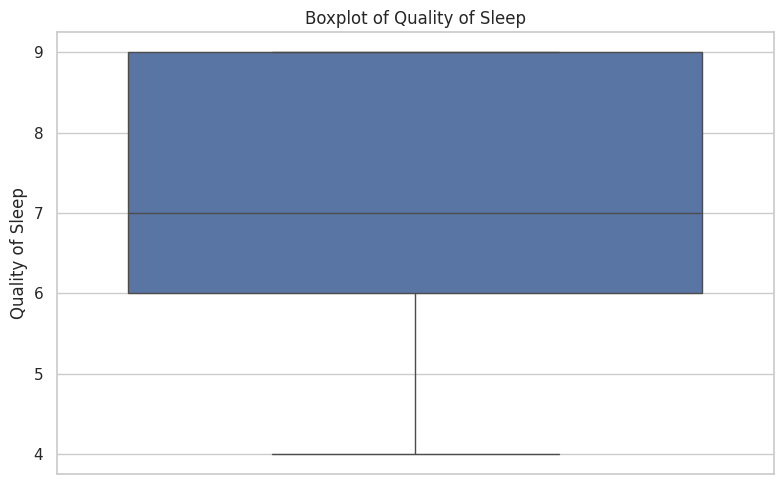

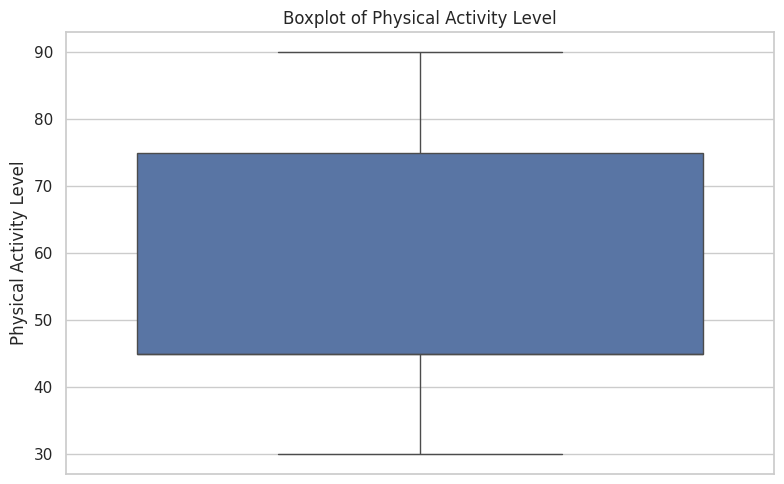

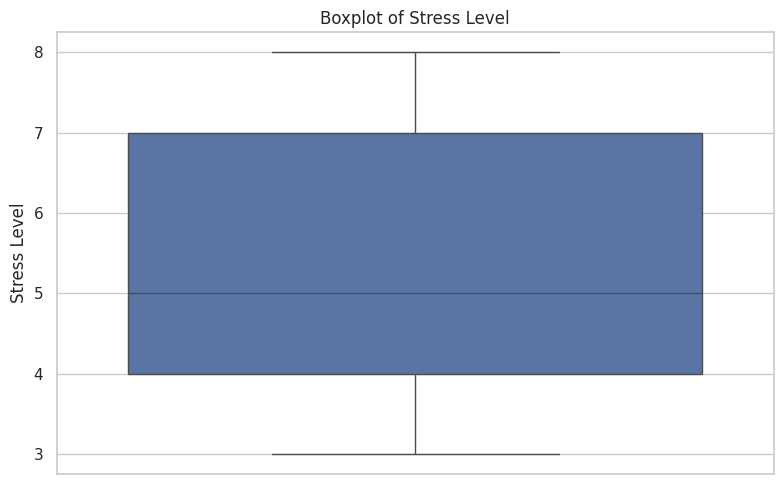

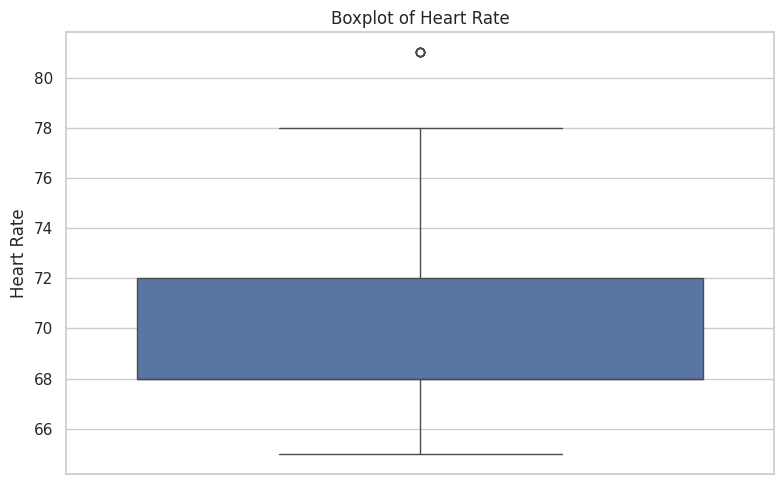

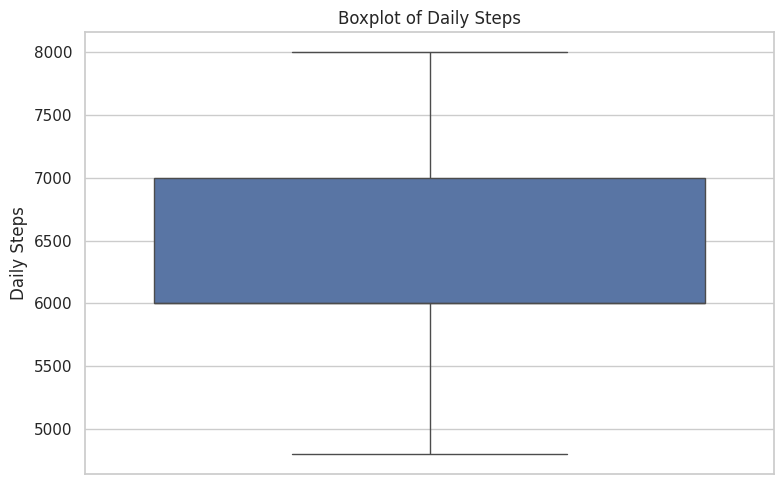

In [22]:
# Boxplot berdasarkan Is_Insomnia
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

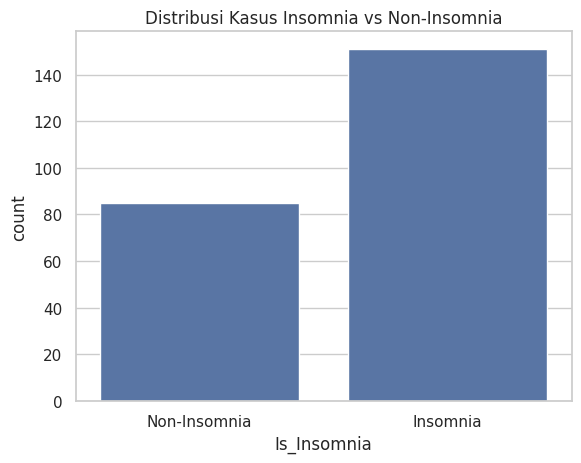

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Is_Insomnia', data=df)
plt.title('Distribusi Kasus Insomnia vs Non-Insomnia')
plt.xticks([0,1], ['Non-Insomnia', 'Insomnia'])
plt.show()

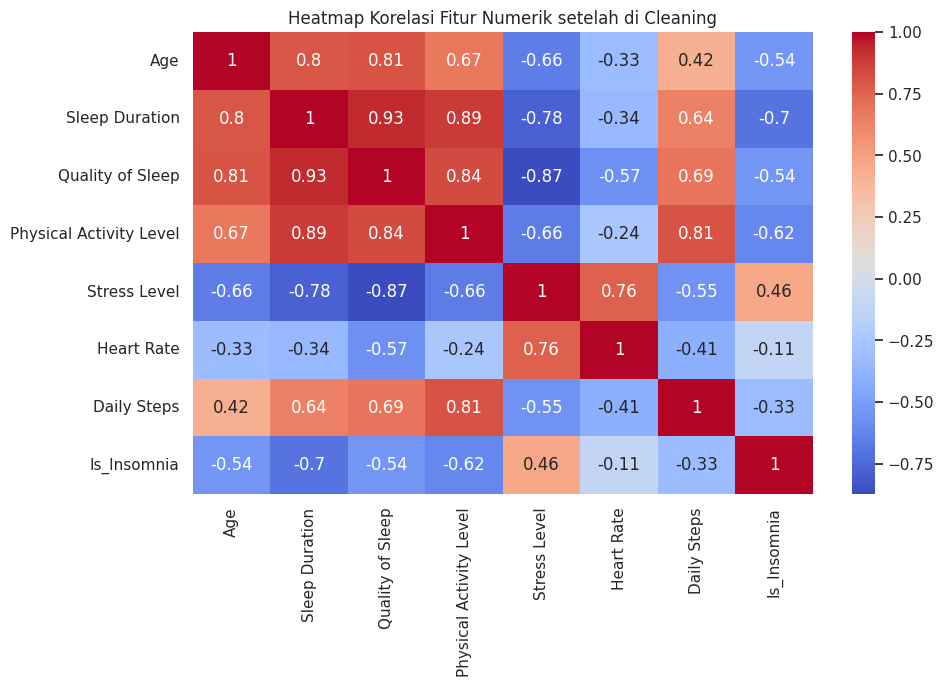

In [26]:
# 12. Heatmap korelasi
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Fitur Numerik setelah di Cleaning")
plt.show()

## Konstruksi Data

In [24]:
df['Is_Insomnia'] = (df['Sleep Disorder'] == 'Insomnia').astype(int)
df.drop(columns=['Sleep Disorder'], inplace=True)

# Cek hasil
print("Distribusi Kategori untuk Kasus Non-Insomnia(0) vs Insomnia(1):")
print(df['Is_Insomnia'].value_counts().sort_index())

Distribusi Kategori untuk Kasus Non-Insomnia(0) vs Insomnia(1):
Is_Insomnia
0     85
1    151
Name: count, dtype: int64


In [27]:
# Pisahkan tekanan darah menjadi sistolik dan diastolik
if 'Blood Pressure' in df.columns:
    # Pisahkan Systolic dan Diastolic
    df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(float)

    # Drop kolom aslinya setelah diproses
    df.drop(columns=['Blood Pressure'], inplace=True)

In [28]:
print("\nContoh Pemisahan Blood Pressure:")
print(df[['Systolic', 'Diastolic']].tail())


Contoh Pemisahan Blood Pressure:
     Systolic  Diastolic
369     140.0       95.0
370     140.0       95.0
371     140.0       95.0
372     140.0       95.0
373     140.0       95.0


In [29]:
# Ubah gender dari object ke float
df['Gender'] = df['Gender'].map({'Female': 0.0, 'Male': 1.0})

# Cek hasil konversi
print(df['Gender'].value_counts())
print(df['Gender'].dtype)

Gender
0.0    145
1.0     91
Name: count, dtype: int64
float64


In [30]:
# Mapping kategori BMI ke nilai numerik
bmi_mapping = {
    'Normal': 0,
    'Normal Weight': 0, # normal dan normal weight disamakan
    'Overweight': 1,
    'Obese': 2
}

# Terapkan mapping dan ubah tipe datanya
df['BMI Category'] = df['BMI Category'].map(bmi_mapping).astype('float64')

In [31]:
df['Sleep_Efficiency'] = df['Sleep Duration'] / 24
df['Stress_Sleep_Interaction'] = df['Stress Level'] * df['Quality of Sleep']
df['Activity_Efficiency'] = df['Daily Steps'] / (df['Physical Activity Level'] + 1)
df['Stress_Sleep_Ratio'] = df['Stress Level'] / (df['Quality of Sleep'] + 1)
df['Sleep_Age_Ratio'] = df['Sleep Duration'] / (df['Age'] + 1)

## Labeling Data

In [32]:
# Pisahkan fitur (X) dan label (y)
X = df.drop(columns=['Is_Insomnia'])  # semua kolom fitur
y = df['Is_Insomnia']                 # label/target

# Cek hasil bentuk data
print("Fitur (X):", X.shape)
print("Label (y):", y.shape)

# Lihat sekilas distribusi label
print(y.value_counts())

Fitur (X): (236, 16)
Label (y): (236,)
Is_Insomnia
1    151
0     85
Name: count, dtype: int64


In [33]:
df.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Is_Insomnia,Systolic,Diastolic,Sleep_Efficiency,Stress_Sleep_Interaction,Activity_Efficiency,Stress_Sleep_Ratio,Sleep_Age_Ratio
67,1.0,33,6.0,6,30,8,0.0,72,5000,1,125.0,80.0,0.250000,48,161.290323,1.142857,0.176471
80,0.0,34,5.8,4,32,8,1.0,81,5200,0,131.0,86.0,0.241667,32,157.575758,1.600000,0.165714
81,0.0,34,5.8,4,32,8,1.0,81,5200,0,131.0,86.0,0.241667,32,157.575758,1.600000,0.165714
94,0.0,36,7.2,8,60,4,0.0,68,7000,1,115.0,75.0,0.300000,32,114.754098,0.444444,0.194595
103,1.0,36,6.6,5,35,7,1.0,74,4800,0,129.0,84.0,0.275000,35,133.333333,1.166667,0.178378


In [34]:
display(df.isnull().sum())

,0
Gender,0
Age,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Heart Rate,0
Daily Steps,0
Is_Insomnia,0


## Training Model

In [42]:
# Hapus baris yang targetnya NaN
df_clean = df.dropna(subset=['Sleep Disorder'])

# Pisahkan fitur dan target
X = df_clean.drop('Sleep Disorder', axis=1)
y = df_clean['Sleep Disorder']

# Drop kolom yang tidak dibutuhkan (contoh: ID biasanya tidak berguna)
X = X.drop('Person ID', axis=1)

# Ubah fitur kategorikal ke numerik
X = pd.get_dummies(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model Random Forest
model = RandomForestClassifier(random_state=42)

# Buat parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Buat GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Jalankan grid search
grid_search.fit(X_train, y_train)
print("Training model selesai!")
print("Best Parameters:", grid_search.best_params_)

# Evaluasi model
y_pred = grid_search.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Training model selesai!
Best Parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9558823529411765


In [43]:
# Menentukan variabel best_model sebagai model terbaik hasil GridSearch
best_model = grid_search.best_estimator_

# Prediksi menggunakan model terbaik hasil GridSearch
y_pred = best_model.predict(X_test)

# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model (GridSearch): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Akurasi Model (GridSearch): 0.9559

Classification Report:
              precision    recall  f1-score   support

    Insomnia       0.91      1.00      0.95        31
 Sleep Apnea       1.00      0.92      0.96        37

    accuracy                           0.96        68
   macro avg       0.96      0.96      0.96        68
weighted avg       0.96      0.96      0.96        68


Confusion Matrix:
[[31  0]
 [ 3 34]]


In [44]:
import joblib
# Export model terbaik ke file .joblib
joblib.dump(grid_search.best_estimator_, 'rforest_model.joblib')

print("Model berhasil disimpan ke 'rforest_model.joblib'")

Model berhasil disimpan ke 'rforest_model.joblib'


In [45]:
# Load model yang sudah disimpan
loaded_model = joblib.load('rforest_model.joblib')

# Contoh prediksi ulang
y_pred = loaded_model.predict(X_test)